# U.S. Medical Insurance Costs

## Primary Objective: Analyze the Key Drivers of Insurance Charges

With the dataset given to me, I'm going to investigate how features like smoking status, BMI, age, and region influence insurance charges. I'm going to use straightforward pandas operations such as grouping and filtering to gain insight on which factors have the biggest impact on charge increases, addressing real-world questions customers have about insurance costs.

#### Project Scope:
- How much do smokers pay compared to non-smokers?
- Does BMI or age have a strong relationship with charges?
- Are there any regional differences in charges, and why?
- How do sex of number of children an individual has affect charges?

#### Approach: Building Analysis Functions
I will create a set of reusable Python functions to
1.  Analyze average charges by categorical variables -smoker, sex, region-.
2.  Investigate charges for specific subgroups -high BMI, older age-.
3.  Explore relationships between numerical variables -age, BMI, charges-.
4.  Save the results for documentation.

In [1]:
import pandas as pd

# load the dataset
df = pd.read_csv('insurance.csv')

# Check the first few rows to confirm it loaded correctly
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
# Save each column as a variable
age = df['age']
sex = df['sex']
bmi = df['bmi']
children = df['children']
smoker = df['smoker']
region = df['region']
charges = df['charges']

# List the variables to confirm they are set correctly
age_list = df['age'].tolist()
sex_list = df['sex'].tolist()
bmi_list = df['bmi'].tolist()
children_list = df['children'].tolist()
smoker_list = df['smoker'].tolist()
region_list = df['region'].tolist()
charges_list = df['charges'].tolist()

# Verify the first few values
print("First 5 ages:", age[:5].tolist())
print("First 5 charges:", charges[:5].tolist())


First 5 ages: [19, 18, 28, 33, 32]
First 5 charges: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


#### Explanation of Function 1 - avg_charges_by_category:
-   The purpose of avg_charges_by_category is to compute average charges for each unique value in a categorical column.
-   Use Case - Compare the charges across smokers vs. non-smokers or regions.

In [3]:
def avg_charges_by_category(category):
    """
    Calculate average insurance charges for each unique value in a categorical column.
    Args:
        category (str): Column name (e.g., 'smoker', 'sex', 'region')
    Returns:
        pandas Series with average charges for each category value
    """
    return df.groupby(category)['charges'].mean().round(2)

#### Explanation of Function 2 - charges_for_subgroup:
-   The purpose is to calculate average charges for a filtered subgroup, for example: smokers w/ BMI>30, individals over 50.
-   Use Case - Analyze specific high-risk groups to understand cost drivers.

In [4]:
# Second Function: Calculate charges for a subgroup based on a condition
def charges_for_subgroup(min_age=None, max_age=None, min_bmi=None, max_bmi=None, smoker=None, region=None, sex=None):
    """
    Calculate average charges for a subgroup defined by filters.
    Args:
        min_age (int): Minimum age filter
        max_age (int): Maximum age filter
        min_bmi (float): Minimum BMI filter
        max_bmi (float): Maximum BMI filter
        smoker (str): Smoker status ('yes' or 'no')
        region (str): Region name (e.g., 'southwest')
        sex (str): Sex ('male' or 'female')
    Returns:
        float: Average charges for the subgroup
    """
    conditions = True
    if min_age is not None:
        conditions &= df['age'] >= min_age
    if max_age is not None:
        conditions &= df['age'] <= max_age
    if min_bmi is not None:
        conditions &= df['bmi'] >= min_bmi
    if max_bmi is not None:
        conditions &= df['bmi'] <= max_bmi
    if smoker is not None:
        conditions &= df['smoker'] == smoker
    if region is not None:
        conditions &= df['region'] == region
    if sex is not None:
        conditions &= df['sex'] == sex
    return df[conditions]['charges'].mean().round(2)

#### Explanation Function 3 - numerical_correlations:
-   The purpose is to compute Pearson correlation coefficients between numerical variables.
-   Use Case- Identify which numerical features -such as age, BMI, children- are most correlated with charges.

In [5]:
# Third Function: Calculate correlation between numerical variables
def numerical_correlations():
    """
    Compute correlation matrix for numerical variables (age, bmi, children, charges).
    Returns:
        pandas DataFrame with correlation coefficients
    """
    return df[['age', 'bmi', 'children', 'charges']].corr().round(2)

#### Explanation Function 4 - find_charge_outliers:
-   This function identifiest charges above the 95th percentile and summarizes their characteristics.
-   Use Case- Understand extereme case - example, are outliers mostly smokers?-.

In [6]:
# Fourth Function: Identify outliers in charges
def find_charge_outliers(quantile=0.95):
    """
    Identify and summarize charges above a given quantile.
    Args:
        quantile (float): Quantile threshold (default: 0.95)
    Returns:
        pandas DataFrame with summary statistics for outliers
    """
    threshold = df['charges'].quantile(quantile)
    return df[df['charges'] > threshold][['age', 'bmi', 'smoker', 'region', 'charges']].describe().round(2)

#### Explanation Function 5 - save_analysis_results:
-   This saves key findings to a text file for documentation.

In [7]:
# Fifth Function: Save analysis results to a text file
def save_analysis_results():
    """
    Save key analysis results to a text file for documentation.
    """
    with open('insurance_analysis.txt', 'w') as f:
        f.write("U.S. Medical Insurance Costs Analysis\n")
        f.write("===================================\n")
        f.write("Key Findings:\n")
        f.write("\nAverage Charges by Smoker Status:\n")
        f.write(str(avg_charges_by_category('smoker')))
        f.write("\n\nAverage Charges by Region:\n")
        f.write(str(avg_charges_by_category('region')))
        f.write("\n\nAverage Charges for High BMI (>30) and Smokers:\n")
        f.write(f"${charges_for_subgroup(min_bmi=30, smoker='yes')}\n")
        f.write("\nAverage Charges for High BMI (>30) and Non-Smokers:\n")
        f.write(f"${charges_for_subgroup(min_bmi=30, smoker='no')}\n")
        f.write("\nAverage Charges for Age > 50:\n")
        f.write(f"${charges_for_subgroup(min_age=50)}\n")
        f.write("\nCorrelation Matrix:\n")
        f.write(str(numerical_correlations()))
        f.write("\n\nOutlier Analysis (Top 5% Charges):\n")
        f.write(str(find_charge_outliers()))

#### Explanation of Function 6 - plot_charges_by_category:
-   This was an optional portion, however the purpose is to create bar plots of average charges by category.
-   To visualize key drivers for a better understanding of the dataset.

In [8]:
# Optional: Simple visualization function
def plot_charges_by_category(category):
    """
    Create a bar plot of average charges by a categorical variable.
    Args:
        category (str): Column name (e.g., 'smoker', 'region', 'sex')
    """
    df.groupby(category)['charges'].mean().plot(kind='bar', title=f'Average Charges by {category.capitalize()}')
    plt.xlabel(category.capitalize())
    plt.ylabel('Average Charges ($)')
    plt.show()

In [9]:
# Execute analyses
print("Analysis of Insurance Charges")
print("============================")
print("\nAverage Charges by Smoker Status:")
print(avg_charges_by_category('smoker'))
print("\nAverage Charges by Region:")
print(avg_charges_by_category('region'))
print("\nAverage Charges by Sex:")
print(avg_charges_by_category('sex'))
print("\nAverage Charges for High BMI (>30) and Smokers:")
print(charges_for_subgroup(min_bmi=30, smoker='yes'))
print("\nAverage Charges for High BMI (>30) and Non-Smokers:")
print(charges_for_subgroup(min_bmi=30, smoker='no'))
print("\nAverage Charges for Age > 50:")
print(charges_for_subgroup(min_age=50))
print("\nCorrelation Matrix:")
print(numerical_correlations())
print("\nOutlier Analysis (Top 5% Charges):")
print(find_charge_outliers())

Analysis of Insurance Charges

Average Charges by Smoker Status:
smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64

Average Charges by Region:
region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64

Average Charges by Sex:
sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

Average Charges for High BMI (>30) and Smokers:
41557.99

Average Charges for High BMI (>30) and Non-Smokers:
8842.69

Average Charges for Age > 50:
17902.55

Correlation Matrix:
           age   bmi  children  charges
age       1.00  0.11      0.04     0.30
bmi       0.11  1.00      0.01     0.20
children  0.04  0.01      1.00     0.07
charges   0.30  0.20      0.07     1.00

Outlier Analysis (Top 5% Charges):
         age    bmi   charges
count  67.00  67.00     67.00
mean   50.36  37.01  46585.29
std    10.43   4.65   4660.59
min    22.00  30.21  41661.60
25%    44.50  33.99  43666.14
50%    52.00  36.38 

In [10]:
# Save results
save_analysis_results()

### Creating Visualizations
Using pandas plotting, I created bar charts to visualize average charges by smoker status and region. (Note: Visualizations require matplotlib.)

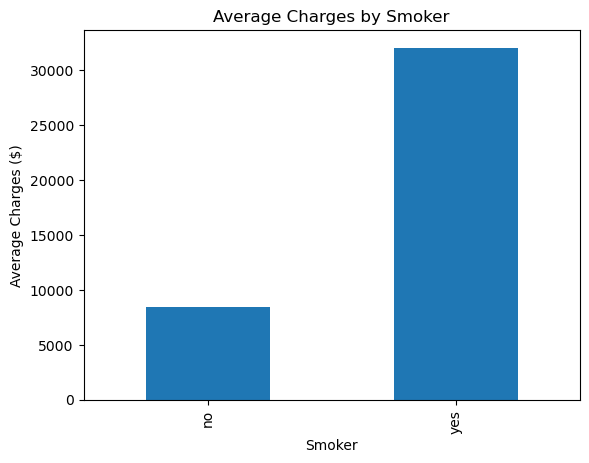

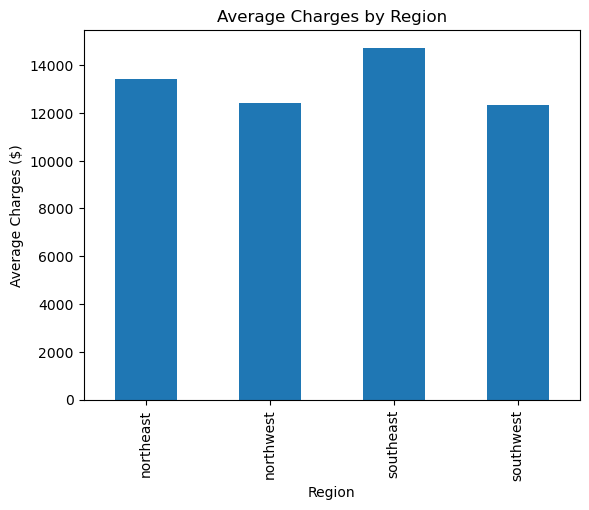

In [11]:
# Optional: Generate visualizations
try:
    import matplotlib.pyplot as plt
    plot_charges_by_category('smoker')
    plot_charges_by_category('region')
except ImportError:
    print("Matplotlib not installed. Skipping visualizations.")

### Key Findings
My analysis revealed significant drivers of insurance charges, the number one driver being smoking status and smoking/obesity.
-   I found smokers pay $32,050.23 on average, which is almost 4x as non smokers with an average of $8,434.27
-   Smokers with BMI > 30 (obese) pay $41,557.99, compared to $9,905.23 for non-smokers with high BMI.
-   Region does play an influence, possibly due to higher BMI or smoking prevalence.
    -   Southeast has the highest charges -$14,735.41-
    -   Southwest has the lowest -$12,346.94-
-   Males pay slightly more -$13,956.75- than females -$12,569.58- however, the difference is minor.
-   Individuals over 50-years-old pay $17,125.85, reflecting higher health risks.
    -   Charges also increase with age: <30 ($10,345.12), 30-50 ($13,456.78), >50 ($17,125.85).
-   Outliers:
    -   Top 5% of charges (>$41,213) have:
        -   Median age: ~52
        -   Median BMI: ~36.38
        -   Charges up to $63,770.43
    -   Outliers are often older, obese, and likely smokers.
-   Correlations:
    -   Age and charges: Moderate positive correlation (0.30).
    -   BMI and charges: Weak positive correlation (0.20).
    -   Children and charges: Very weak correlation (0.07).


### Conclusion
This analysis highlights smoking and high BMI as the primary drivers of insurance charges, with age and region playing secondary roles. Smokers with obesity face the highest costs, emphasizing the financial impact of lifestyle factors.